In [1]:
# Importing required libraries for data cleaning
import pandas as pd

# Load the dataset
file_path = 'Amazon_Sale_Report.csv'  # Adjust file path if needed
data = pd.read_csv(file_path)

# Checking the first few rows of the dataset
print(data.head())

# Data Cleaning
# 1. Dropping rows with missing critical values (e.g., 'Amount', 'Order ID')
data_cleaned = data.dropna(subset=['Amount', 'Order ID'])

# 2. Dropping duplicate rows
data_cleaned = data_cleaned.drop_duplicates()

# 3. Converting 'Date' column to datetime type
data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')

# 4. Handle missing values in other non-critical columns
data_cleaned['ship-city'] = data_cleaned['ship-city'].fillna('Unknown')

# Checking data types and cleaned data
print(data_cleaned.dtypes)
print(data_cleaned.isnull().sum())


C:\Users\ROG\AppData\Local\Temp\ipykernel_12976\3770084234.py:6: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  data = pd.read_csv(file_path)


   index             Order ID      Date                        Status  \
0      0  405-8078784-5731545  04-30-22                     Cancelled   
1      1  171-9198151-1101146  04-30-22  Shipped - Delivered to Buyer   
2      2  404-0687676-7273146  04-30-22                       Shipped   
3      3  403-9615377-8133951  04-30-22                     Cancelled   
4      4  407-1069790-7240320  04-30-22                       Shipped   

  Fulfilment Sales Channel  ship-service-level    Style              SKU  \
0   Merchant      Amazon.in           Standard   SET389   SET389-KR-NP-S   
1   Merchant      Amazon.in           Standard  JNE3781  JNE3781-KR-XXXL   
2     Amazon      Amazon.in          Expedited  JNE3371    JNE3371-KR-XL   
3   Merchant      Amazon.in           Standard    J0341       J0341-DR-L   
4     Amazon      Amazon.in          Expedited  JNE3671  JNE3671-TU-XXXL   

        Category  ... currency  Amount    ship-city   ship-state  \
0            Set  ...      INR  647.

C:\Users\ROG\AppData\Local\Temp\ipykernel_12976\3770084234.py:19: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data_cleaned['Date'] = pd.to_datetime(data_cleaned['Date'], errors='coerce')


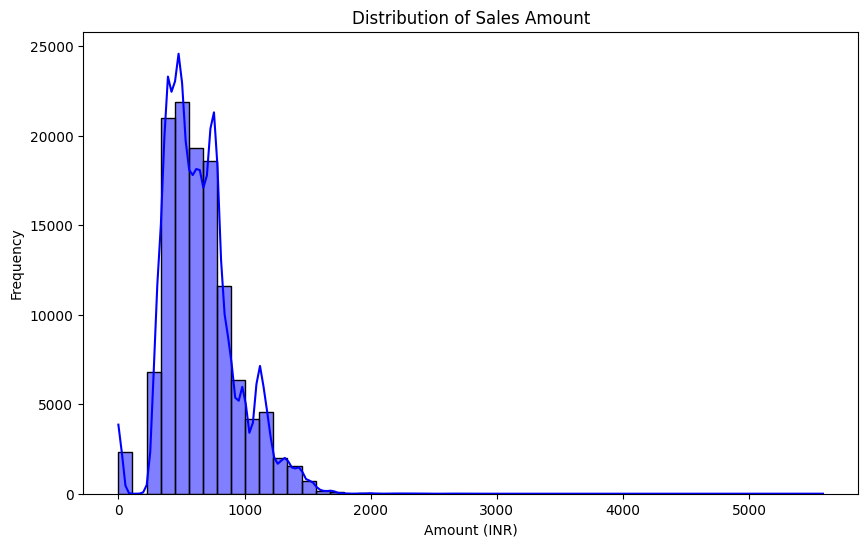

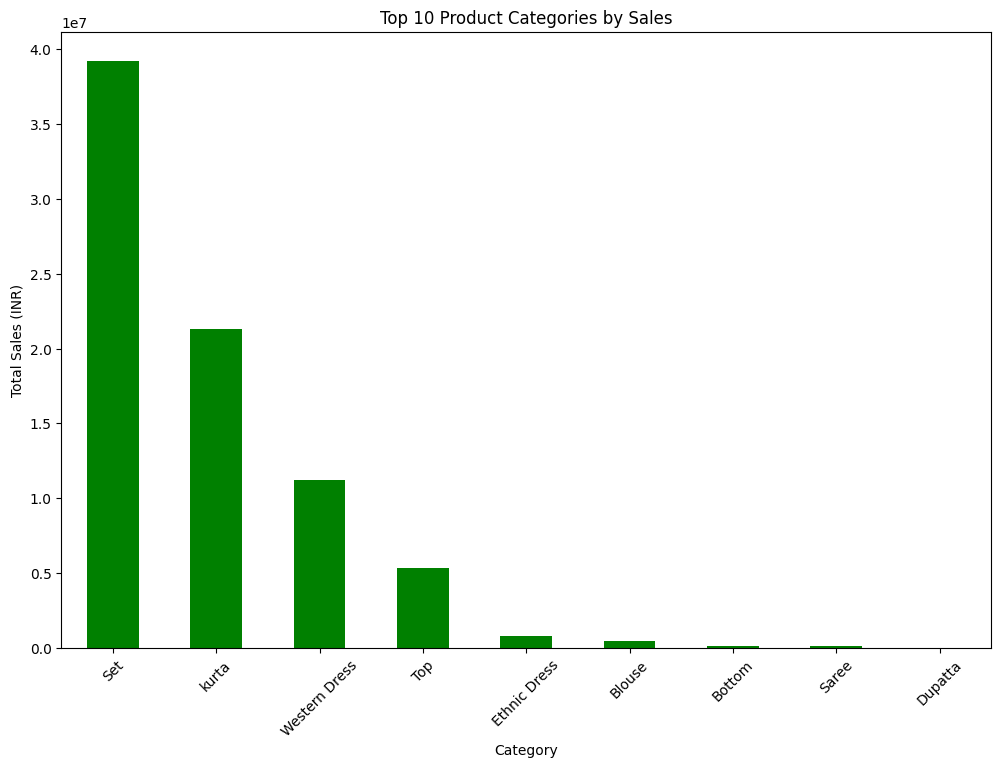

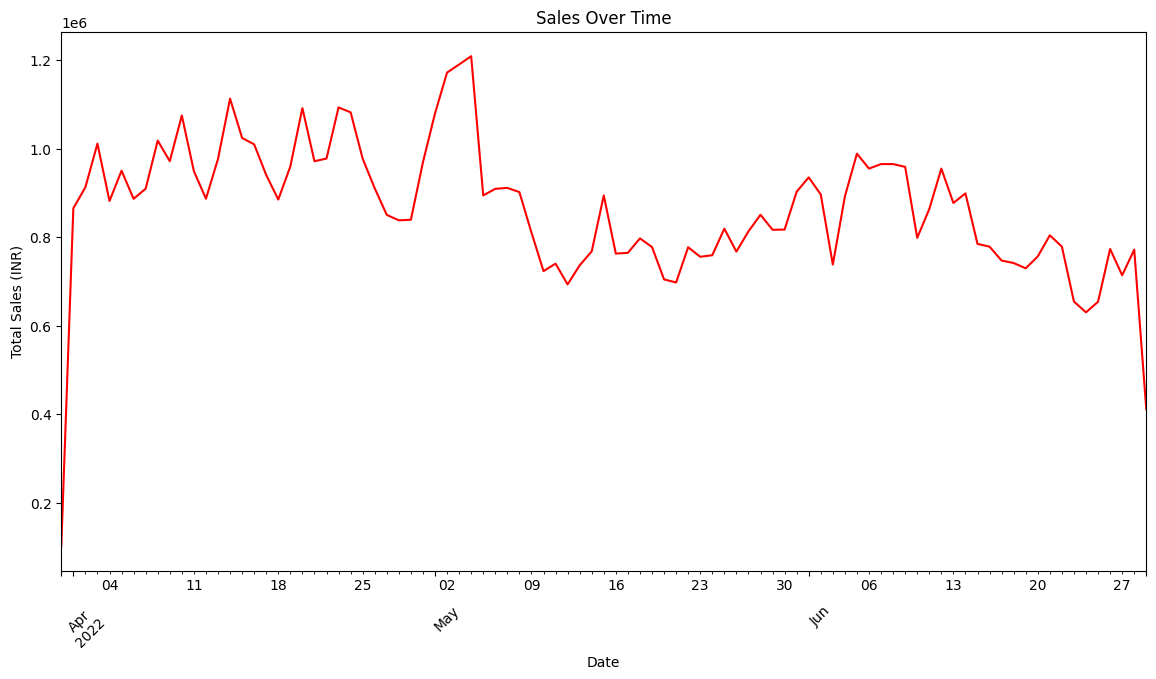

In [2]:
# Importing required libraries for visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Plotting the distribution of 'Amount' (Sales Amount)
plt.figure(figsize=(10, 6))
sns.histplot(data_cleaned['Amount'], kde=True, color='blue', bins=50)
plt.title('Distribution of Sales Amount')
plt.xlabel('Amount (INR)')
plt.ylabel('Frequency')
plt.show()

# Plotting top product categories by total sales
plt.figure(figsize=(12, 8))
category_sales = data_cleaned.groupby('Category')['Amount'].sum().sort_values(ascending=False).head(10)
category_sales.plot(kind='bar', color='green')
plt.title('Top 10 Product Categories by Sales')
plt.xlabel('Category')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()

# Sales over time (time series analysis)
sales_by_date = data_cleaned.groupby('Date')['Amount'].sum()

plt.figure(figsize=(14, 7))
sales_by_date.plot(kind='line', color='red')
plt.title('Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.xticks(rotation=45)
plt.show()


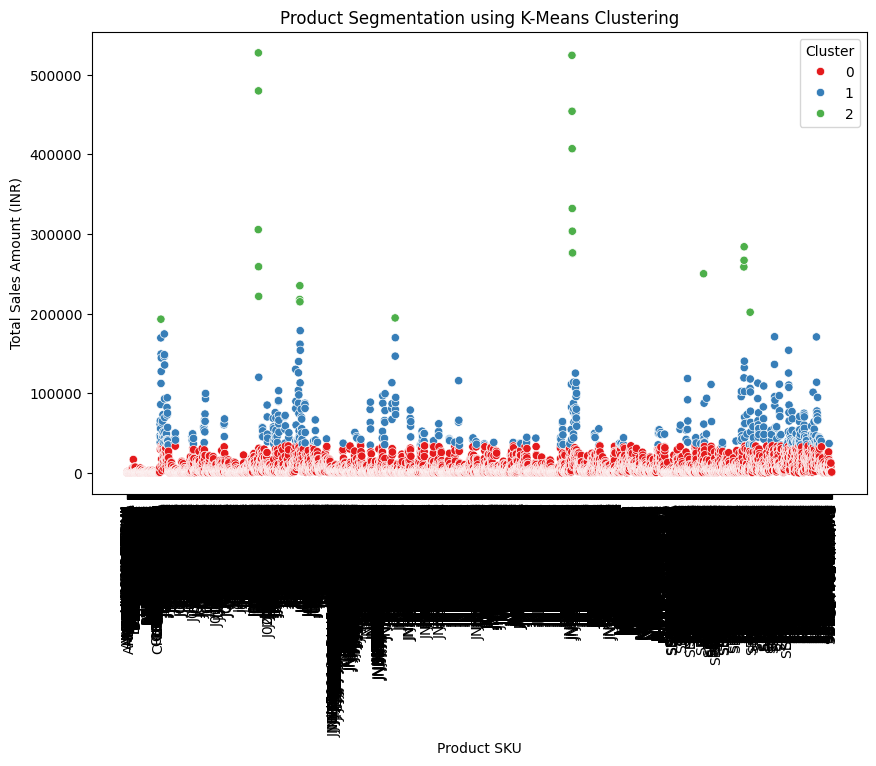

In [3]:
# Importing KMeans for clustering
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Aggregating data by SKU (product) and summing the sales amount for each product
product_sales = data_cleaned.groupby('SKU')['Amount'].sum().reset_index()

# Standardizing the data for clustering
scaler = StandardScaler()
scaled_data = scaler.fit_transform(product_sales[['Amount']])

# Apply K-Means clustering (e.g., k=3 clusters for products)
kmeans = KMeans(n_clusters=3, random_state=42)
product_sales['Cluster'] = kmeans.fit_predict(scaled_data)

# Plotting the clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(x='SKU', y='Amount', hue='Cluster', data=product_sales, palette='Set1')
plt.title('Product Segmentation using K-Means Clustering')
plt.xlabel('Product SKU')
plt.ylabel('Total Sales Amount (INR)')
plt.xticks(rotation=90)
plt.show()


In [4]:
# Importing required libraries for Association Rule Mining
from apyori import apriori

# Preparing the data for Association Rule Mining
transactions = data_cleaned.groupby('Order ID')['SKU'].apply(list).values.tolist()

# Apply the Apriori algorithm with lower min_support and min_confidence
rules = apriori(transactions, min_support=0.001, min_confidence=0.2, min_lift=2)

# Convert results into a list
rules_list = list(rules)

# Inspect the rules
def inspect(rules_list):
    lhs = [tuple(rule[2][0][0])[0] for rule in rules_list]  # Left-hand side (LHS) of the rule
    rhs = [tuple(rule[2][0][1])[0] for rule in rules_list]  # Right-hand side (RHS) of the rule
    supports = [rule[1] for rule in rules_list]  # Support of the rule
    confidences = [rule[2][0][2] for rule in rules_list]  # Confidence of the rule
    lifts = [rule[2][0][3] for rule in rules_list]  # Lift of the rule
    
    # Create a DataFrame to display the results
    rules_df = pd.DataFrame({
        'LHS': lhs,
        'RHS': rhs,
        'Support': supports,
        'Confidence': confidences,
        'Lift': lifts
    })
    return rules_df.sort_values(by='Lift', ascending=False)

# Inspect the top association rules
association_rules = inspect(rules_list)
print(association_rules.head(10))


Empty DataFrame
Columns: [LHS, RHS, Support, Confidence, Lift]
Index: []


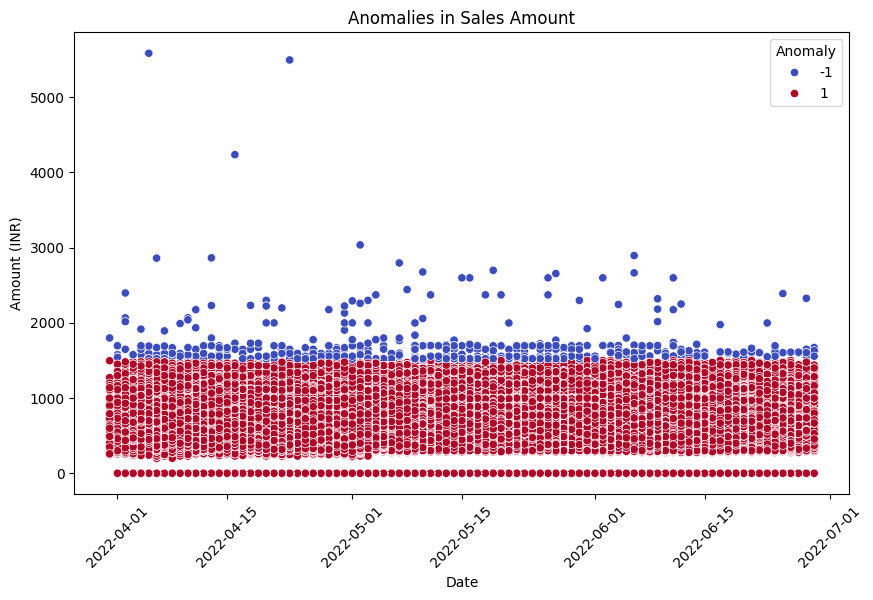

In [5]:
# Importing Isolation Forest for anomaly detection
from sklearn.ensemble import IsolationForest

# Using the 'Amount' column for anomaly detection
anomaly_detector = IsolationForest(n_estimators=100, contamination=0.01)
data_cleaned['Anomaly'] = anomaly_detector.fit_predict(data_cleaned[['Amount']])

# Visualizing anomalies
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Date', y='Amount', hue='Anomaly', data=data_cleaned, palette='coolwarm')
plt.title('Anomalies in Sales Amount')
plt.xlabel('Date')
plt.ylabel('Amount (INR)')
plt.xticks(rotation=45)
plt.show()


C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)
C:\Users\ROG\AppData\Roaming\Python\Python311\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency D will be used.
  self._init_dates(dates, freq)


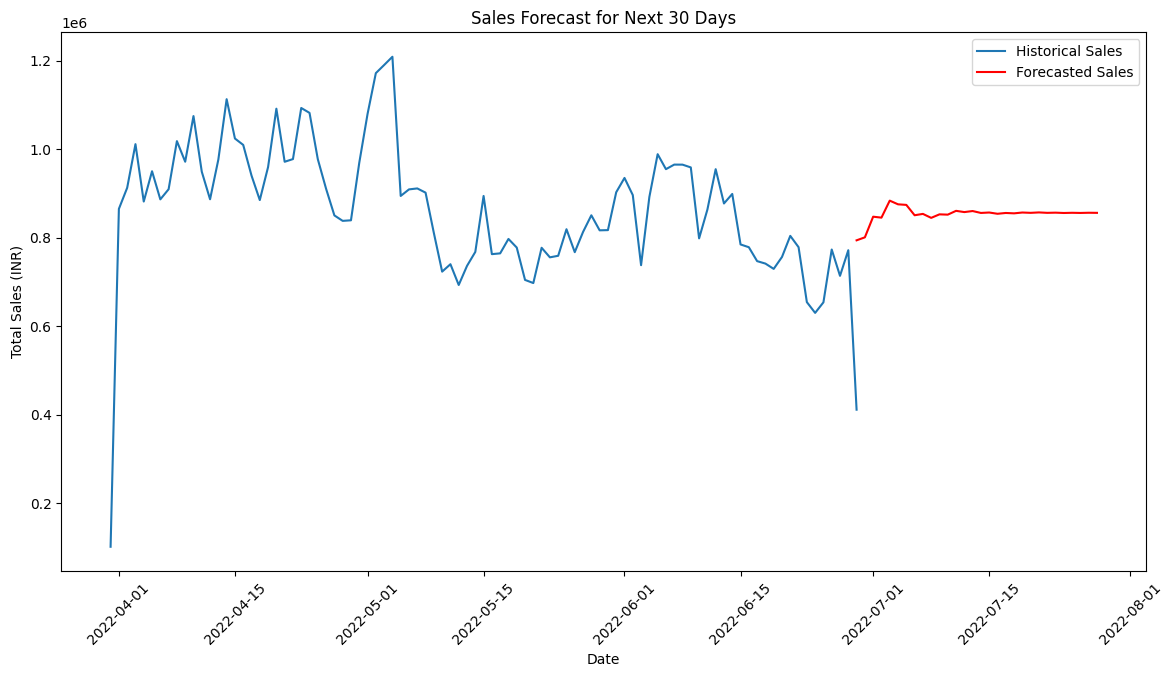

In [6]:
# Importing ARIMA for Time Series Forecasting
from statsmodels.tsa.arima.model import ARIMA

# Preparing the sales data by Date
sales_by_date = data_cleaned.groupby('Date')['Amount'].sum()

# Splitting data into training and test set
train_size = int(len(sales_by_date) * 0.8)
train, test = sales_by_date[:train_size], sales_by_date[train_size:]

# Fitting ARIMA model (p=5, d=1, q=0)
model = ARIMA(train, order=(5, 1, 0))
model_fit = model.fit()

# Forecasting the next 30 days
forecast = model_fit.forecast(steps=30)

# Plot the historical and forecasted sales
plt.figure(figsize=(14, 7))
plt.plot(sales_by_date.index, sales_by_date.values, label='Historical Sales')
plt.plot(pd.date_range(start=sales_by_date.index[-1], periods=30, freq='D'), forecast, label='Forecasted Sales', color='red')
plt.title('Sales Forecast for Next 30 Days')
plt.xlabel('Date')
plt.ylabel('Total Sales (INR)')
plt.legend()
plt.xticks(rotation=45)
plt.show()
